<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>


# Introduction

Embarking on a journey through 1970s Boston, Massachusetts, this project centers on the task of developing a robust model for a real estate development company. The objective at hand is the evaluation of residential project feasibility prior to initiation. The model is designed to estimate home prices, taking into account key features like the number of rooms, proximity to employment centers, the socioeconomic landscape of the area, and the student-to-teacher ratio in local schools. This report outlines the systematic approach taken to create a comprehensive model tailored to these specific requirements.

### To achieve the project objectives, the following steps were undertaken:

* Exploration and Analysis of Boston House Price Data: The initial phase involved a thorough analysis and exploration of the Boston house price dataset.

* Data Splitting for Training and Testing: In order to build a reliable model, the dataset was strategically divided into training and testing sets.

* Implementation of Multivariable Regression: A crucial step in the project involved executing a multivariable regression to establish the relationships between various factors and housing prices.

* Evaluation of Model's Coefficients and Residuals: Rigorous evaluation was conducted, scrutinizing the model's coefficients and residuals to ensure accuracy and reliability.

* Data Transformation for Enhanced Model Performance: Recognizing the need for optimization, data transformation techniques were employed to enhance the overall performance of the model.

* Utilization of the Model for Property Price Estimation: The final step involved leveraging the developed model to estimate property prices, thereby fulfilling the overarching objective of the project.

### Boston House Price Dataset

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


###  Import Statements


In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [10]:
data = pd.read_csv('boston.csv', index_col=0)

# Preliminary Data Exploration 🔎


* Shape of dataset 
* Column names
* Are there any NaN values or duplicates?

In [58]:
data.shape 

(506, 14)

In [60]:
data.columns 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [14]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [15]:
data.count() # number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [17]:
data.isna().values.any()

False

In [18]:
data.duplicated().values.any()

False

There are no null (i.e., NaN) values.

## Descriptive Statistics

* Average students per teacher ratio, average home price, and the nature of the CHAS feature were explored.
* The minimum and maximum values of the CHAS feature were identified with an understanding of their significance.
* The dataset provided insights into the range of rooms per dwelling, encompassing both minimum and maximum values.

In [19]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


`CHAS` shows whether the home is next to the Charles River or not. As such, it only has the value 0 or 1. This kind of feature is also known as a dummy variable. 

The average price of a Boston home in the 1970s was 22.53 or $22,530. We've experienced a lot of inflation and house price appreciation since then!

## Visualise the Features

Utilizing Seaborn's .displot(), a visual exploration of key variables was conducted:

* The distribution of home prices (PRICE) in thousands, average number of rooms per owner unit (RM), weighted distance to Boston employment centres (DIS), and the index of accessibility to highways (RAD) were depicted through bar charts with superimposed Kernel Density Estimates (KDE).
* The aspect parameter was set to 2 for an enhanced visual representation.
* Observations were made regarding the patterns and shapes of the distributions to derive insights into the data characteristics.

#### House Prices 💰

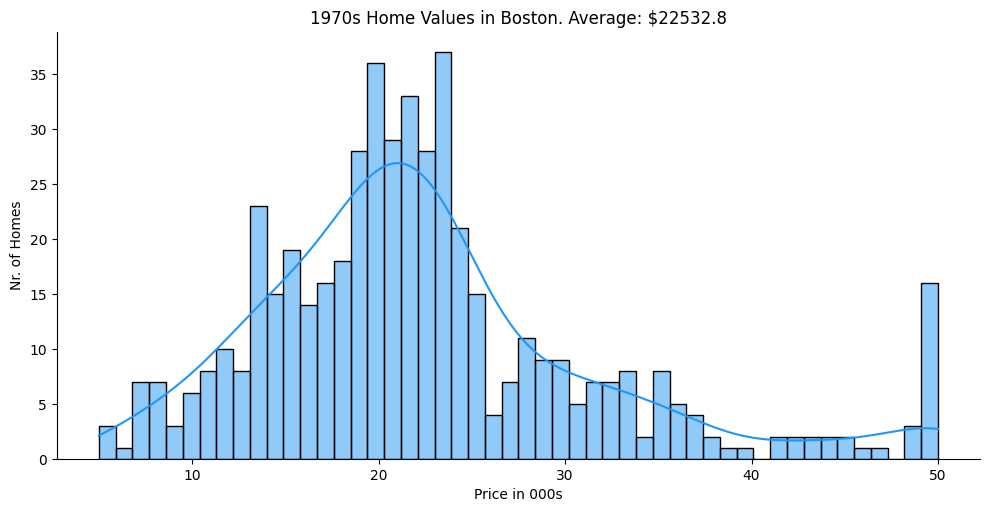

In [20]:
sns.displot(data['PRICE'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

Note there is a spike in the number homes at the very right tail at the $50,000 mark.

#### Distance to Employment - Length of Commute 

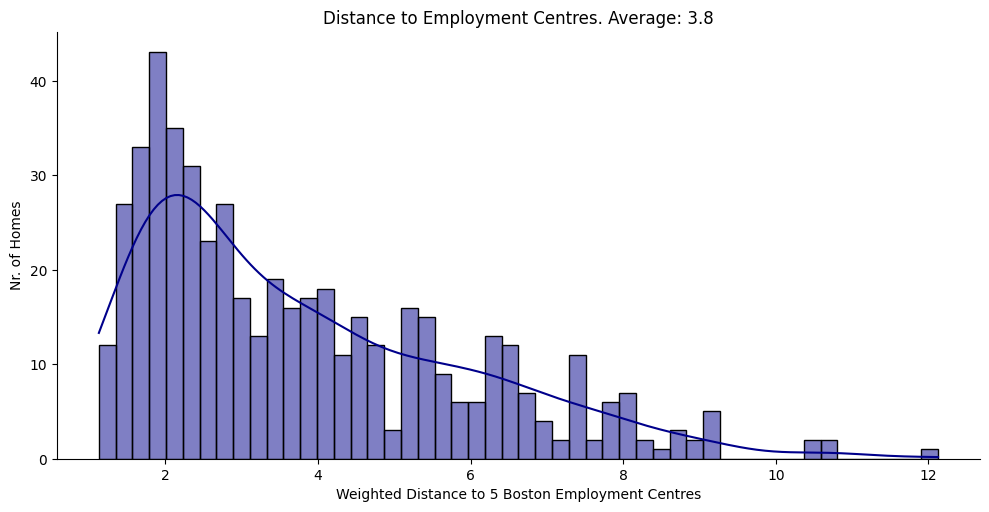

In [21]:
sns.displot(data.DIS, 
            bins=50, 
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

Most homes are about 3.8 miles away from work. There are fewer and fewer homes the further out we go. 

#### Number of Rooms

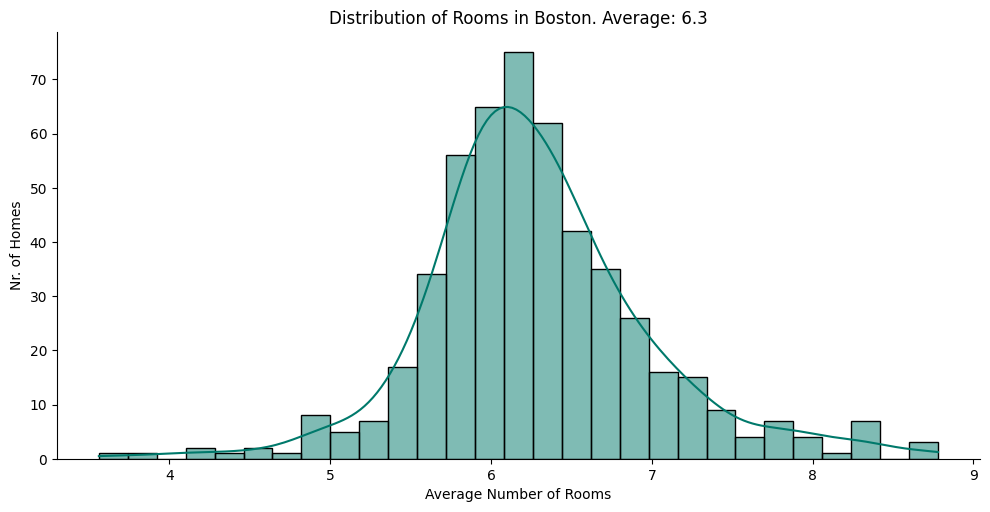

In [22]:
sns.displot(data.RM, 
            aspect=2,
            kde=True, 
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways 

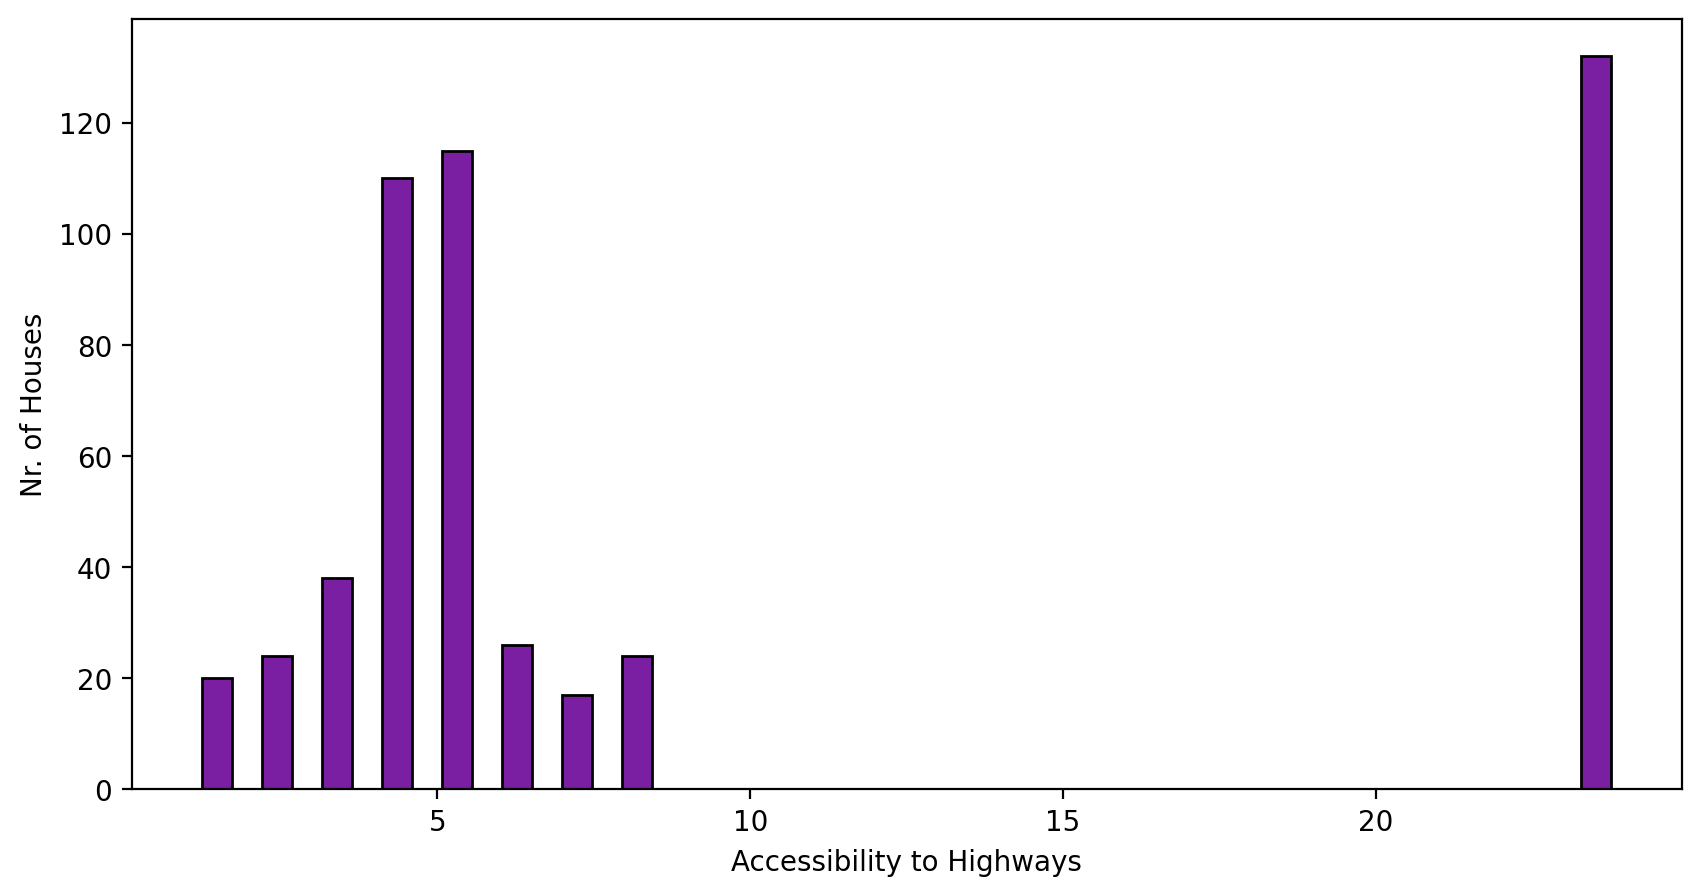

In [23]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

RAD is an index of accessibility to roads. Better access to a highway is represented by a higher number. There's a big gap in the values of the index. 

#### Next to the River?

For visualizing the distribution of homes in proximity to the river (CHAS), a bar chart was created using Plotly. The chart highlights the contrast between homes situated away from the river and those adjacent to it.


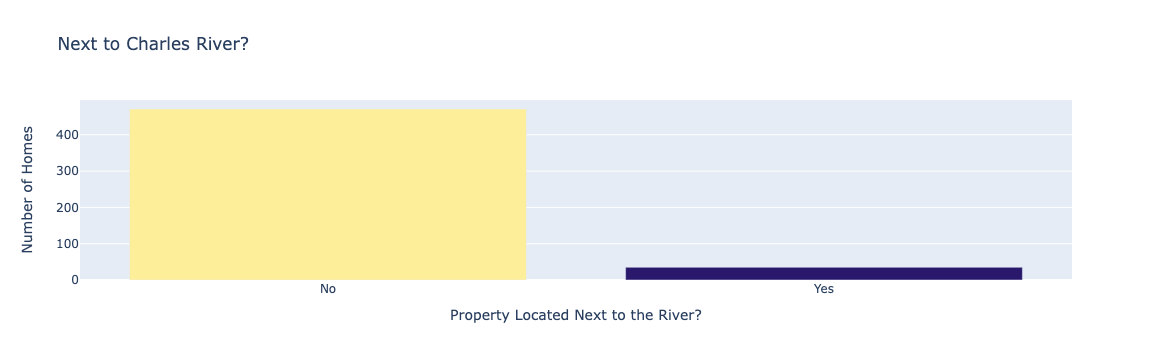

In [53]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

We see that out of the total number of 506 homes, only 35 are located next to the Charles River. 

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

Anticipating the relationships within the dataset, the following predictions were made:

* NOX and DIS Relationship: An inverse relationship between pollution (NOX) and the distance to employment (DIS) is expected, as areas farther from employment centers might have lower pollution levels.

* RM and PRICE Relationship: A positive correlation between the number of rooms (RM) and home value (PRICE) is expected, given that larger homes tend to have higher prices.

* LSTAT and PRICE Relationship: An inverse relationship is expected between the percentage of poverty in an area (LSTAT) and home prices (PRICE), as higher poverty rates may correlate with lower home values.

After making these predictions, a Seaborn .pairplot() was executed to visualize all the relationships simultaneously. The observed patterns in the pairplot were then compared to the initial expectations to validate or revise the predictions.

#### Distance from Employment vs. Pollution

Compare DIS and NOX
Explore the relationship between distance from employment (DIS) and nitric oxide pollution (NOX) by employing Seaborn's .jointplot(). Examine whether pollution tends to increase or decrease with greater distances from employment centers.

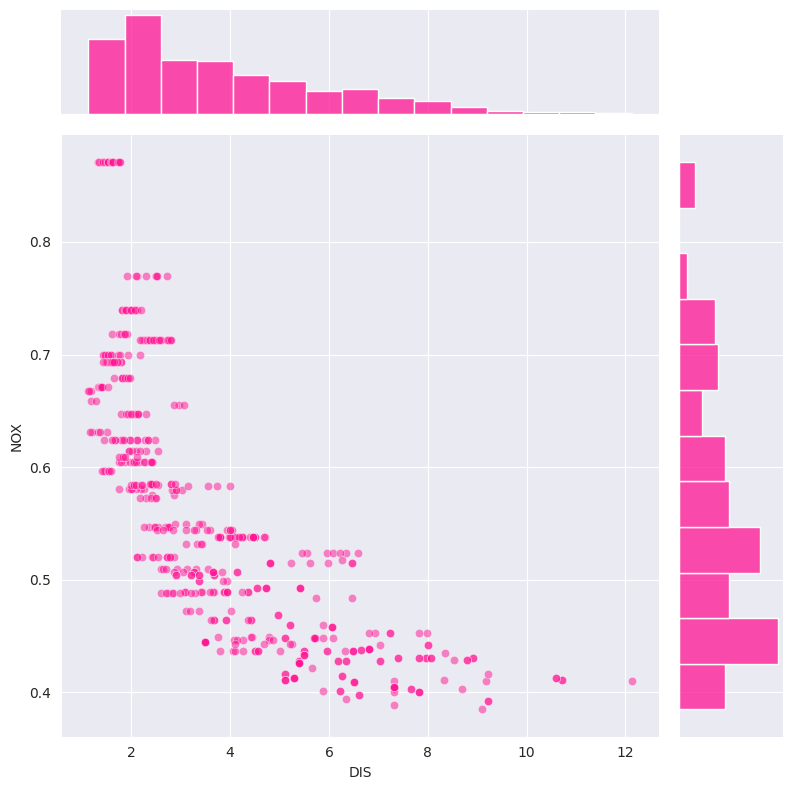

In [26]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'], 
                y=data['NOX'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

We see that pollution goes down as we go further and further out of town. This makes intuitive sense. However, even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, DIS of 9 miles and 12 miles have very similar levels of pollution. 

#### Proportion of Non-Retail Industry versus Pollution 

Compare INDUS and NOX
Investigate the association between the proportion of non-retail industry (INDUS) and nitric oxide pollution (NOX) through Seaborn's .jointplot(). Evaluate whether pollution tends to increase or decrease in areas with a higher proportion of industrial activity.

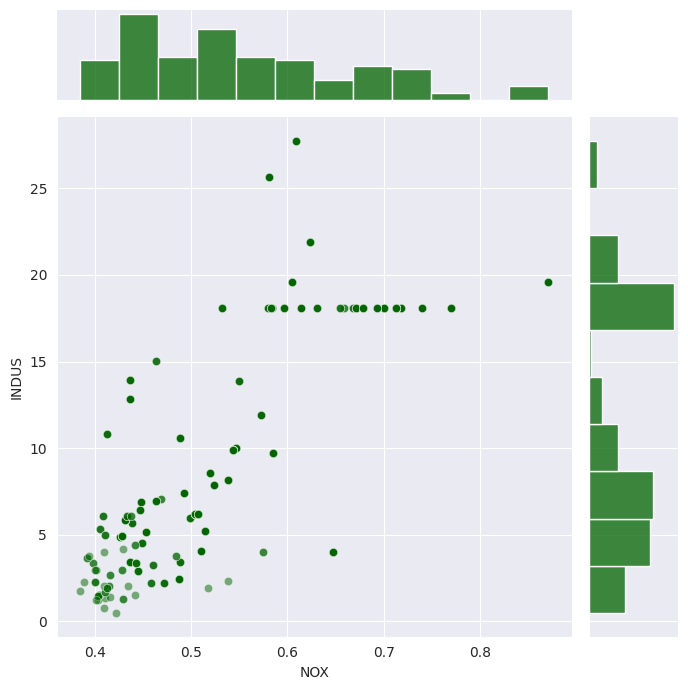

In [27]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.NOX, 
                y=data.INDUS, 
                # kind='hex', 
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

#### % of Lower Income Population vs Average Number of Rooms

Compare LSTAT and RM
Examine the relationship between the proportion of lower-income population (LSTAT) and the number of rooms per dwelling (RM) using Seaborn's .jointplot(). Investigate how the number of rooms varies with the poverty level of an area, specifically whether homes tend to have more or fewer rooms when LSTAT is low.

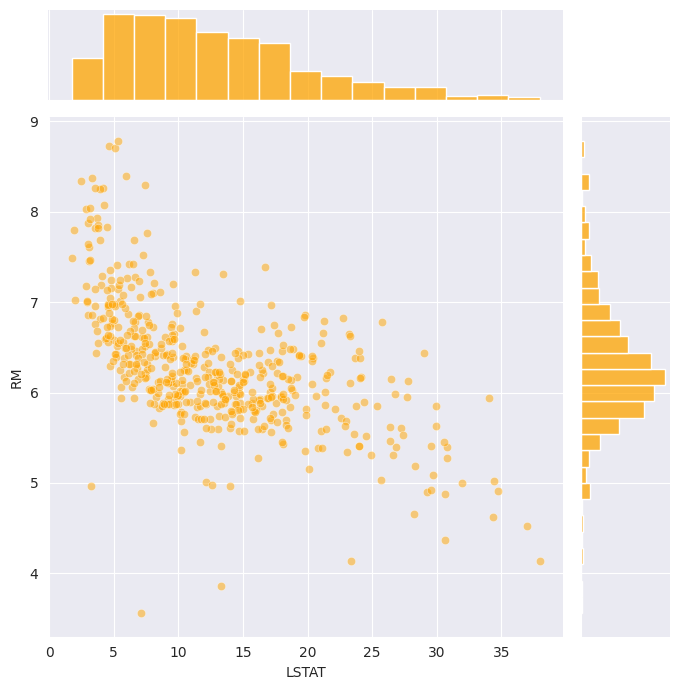

In [28]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['LSTAT'], 
                y=data['RM'], 
                # kind='hex', 
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%. 

#### % of Lower Income Population versus Home Price

Compare LSTAT and PRICE
Explore the impact of the proportion of lower-income population (LSTAT) on home prices (PRICE) by utilizing Seaborn's .jointplot(). Analyze the relationship between these variables to understand how the proportion of lower-income residents in an area influences home prices.

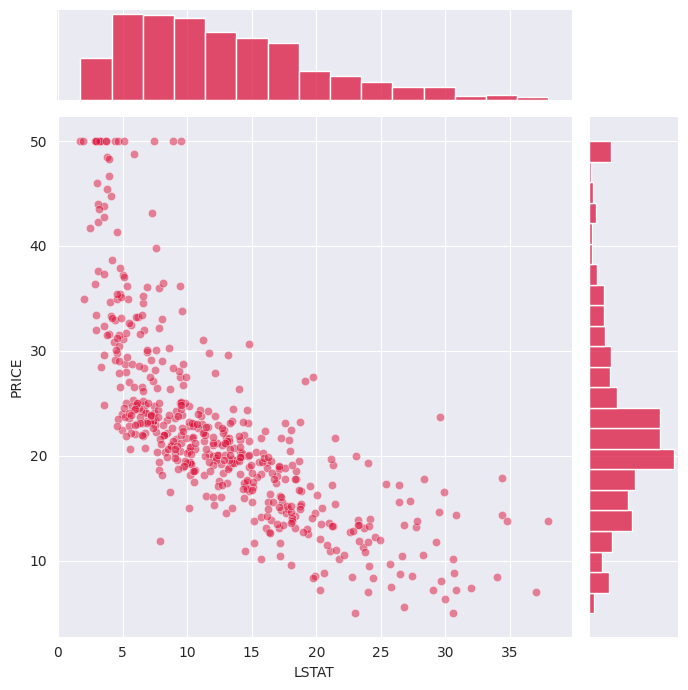

In [29]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
                # kind='hex', 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

#### Number of Rooms versus Home Value

Compare RM and PRICE
Investigate the relationship between the number of rooms per dwelling (RM) and home prices (PRICE) through Seaborn's .jointplot(). Explored how the number of rooms influences home prices, considering the common intuition that more rooms might impact home values.  

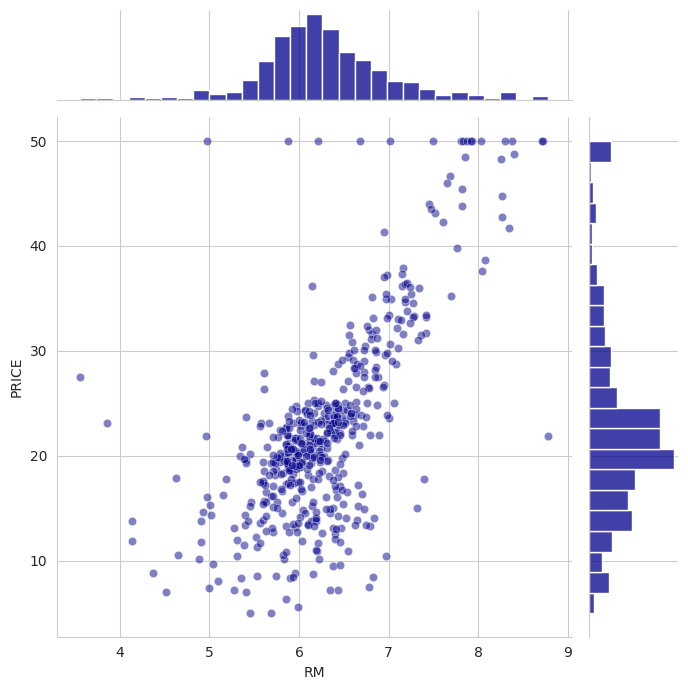

In [30]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM, 
                y=data.PRICE, 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

Again, we see those homes at the $50,000 mark all lined up at the top of the chart. Perhaps there was some sort of cap or maximum value imposed during data collection. 

# Split Training & Test Dataset

Train-Test Split
To ensure model evaluation on out-of-sample data, split the dataset into four subsets: X_train, X_test, y_train, and y_test. The split ratio is approximately 80/20, and a random_state value of 10 is set for result consistency.

In [31]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [32]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

our linear model involved a single feature (movie budgets). In the current scenario, with a total of 13 features, the form of our Linear Regression model expands to encompass all these features.

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Regression R-squared
Utilize sklearn to perform regression on the training dataset and observe the R-squared value for the training data regression.

In [33]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


0.75 is a very high r-squared!

### Evaluate the Coefficients of the Model

Regression Coefficients Report
In the process of conducting a sense check on the regression coefficients:

Examined the sign of the coefficient for the feature RM (number of rooms) to validate its expected positive relation.
Assessed the sign of the coefficient for the feature LSTAT (proportion of lower-income population) to confirm alignment with intuition and the scatter plot.
Investigated the signs of the other coefficients, ensuring their consistency with expectations.
Calculated the premium for a room with 6 rooms compared to one with 5 rooms based on the model's coefficients, determining the additional cost associated with an extra room.

In [34]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [35]:

premium = regr_coef.loc['RM'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals


Residuals Evaluation
Moving forward, the evaluation of our regression extends beyond R-squared to include an examination of residuals. Residuals represent the disparities between the model's predictions and the actual values within y_train.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```




In [36]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

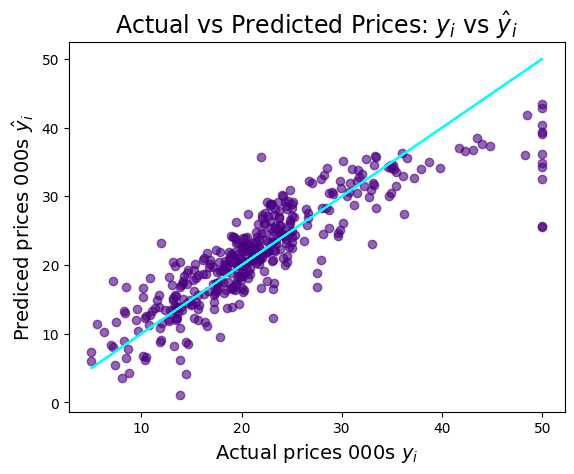

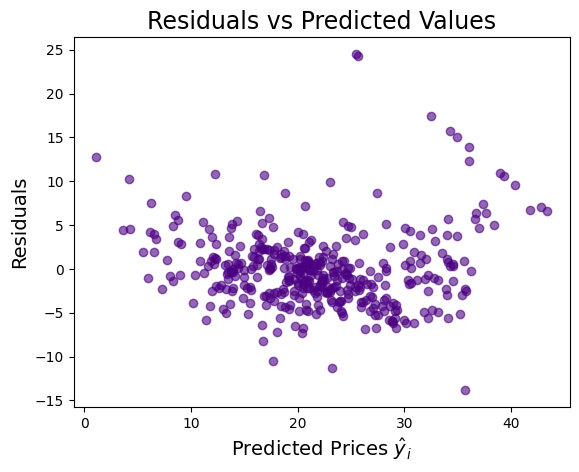

In [37]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

### Residuals Analysis

To ascertain the quality of our regression model, we inspect the residuals—representing the errors in our predictions. A random distribution of residuals is desired to avoid systematic biases.


Skewness and Mean Evaluation:

Calculate the mean and skewness of the residuals.
A skewness close to zero indicates a symmetrical distribution; a normal distribution has a skewness of 0.
Assess whether the mean of the residuals significantly deviates from zero.
Distribution Visualization:

Utilize Seaborn's .displot() to create a histogram with Kernel Density Estimate (KDE) for the residuals.
The ultimate aim is to achieve a residuals distribution close to normal—symmetrical, with a skewness of 0 and a mean close to zero.

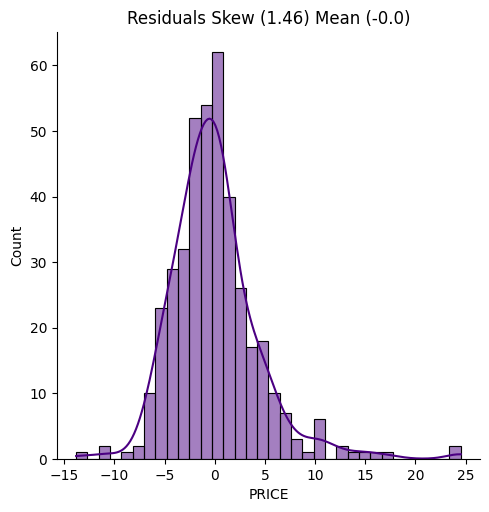

In [38]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

We see that the residuals have a skewness of 1.46. There could be some room for improvement here.  

### Data Transformations for a Better Fit

In considering a data transformation approach:

Visualized the original distribution of house prices using Seaborn's .displot().
Calculated the skewness of the original price distribution.
Utilized NumPy's log() function to generate a Series with log-transformed prices.
Plotted the log prices using Seaborn's .displot() and assessed the skewness of the transformed distribution.
Evaluated which distribution, either the original or log-transformed, exhibited a skew closer to zero.

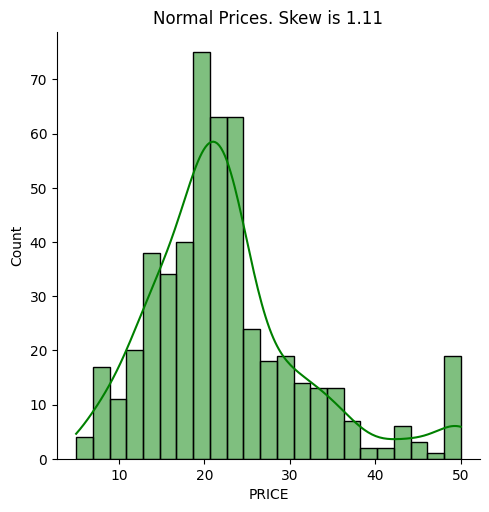

In [39]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

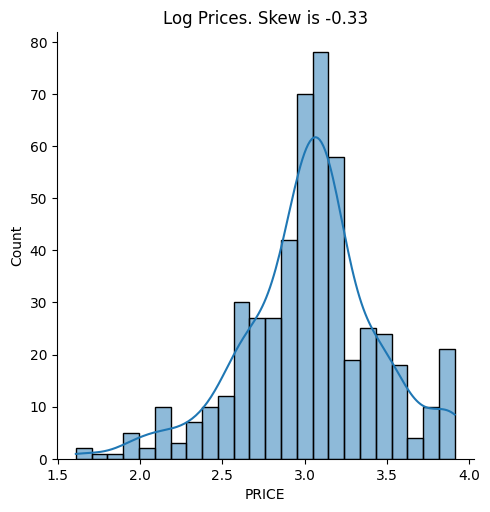

In [40]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals. 

#### log transformation

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset

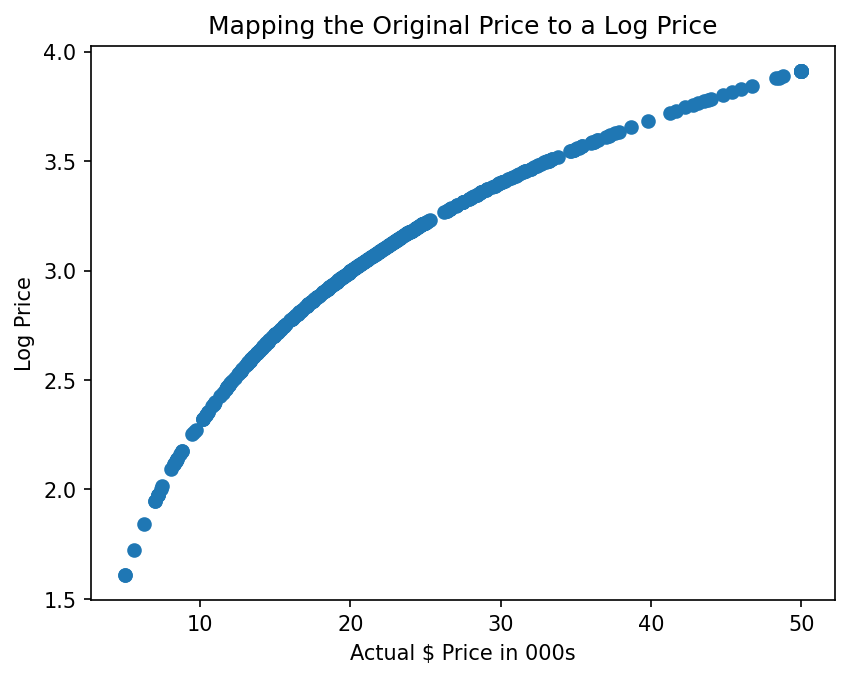

In [41]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

After transitioning to log prices, conducted a second regression with the transformed target data:

* Employed train_test_split() with the same random state for consistency.
* Performed a second regression using the log-transformed target data.
* Determined the R-squared value for the regression on the training data.
* Assessed whether the model fit has improved compared to the previous regression based on this measure.

In [42]:
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


This time we got an r-squared of 0.79 compared to 0.75. This looks like a promising improvement. 

## Evaluating Coefficients with Log Prices

In the context of the log prices transformation:

* Explored the coefficients of the new regression model and observed their signs.
* Evaluated the impact of being next to the river on property prices.
* Analyzed how the quality of schools affects property prices, particularly in relation to the number of students per teacher. 

In [43]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00



The key thing we look for is still the sign - being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore property prices are higher next to the river. 

More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO. 

## Regression with Log Prices & Residual Plots

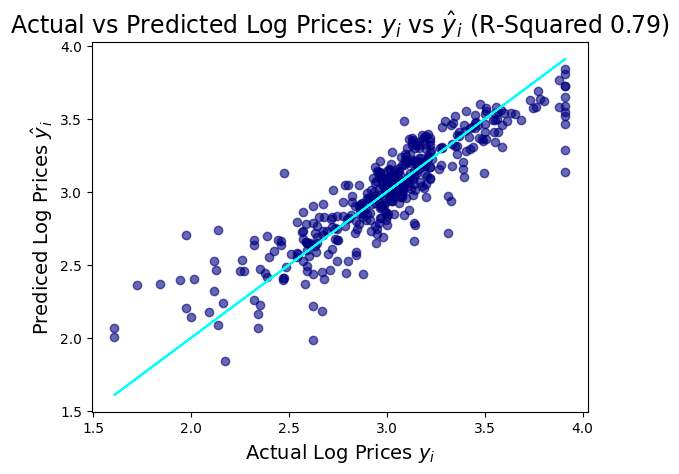

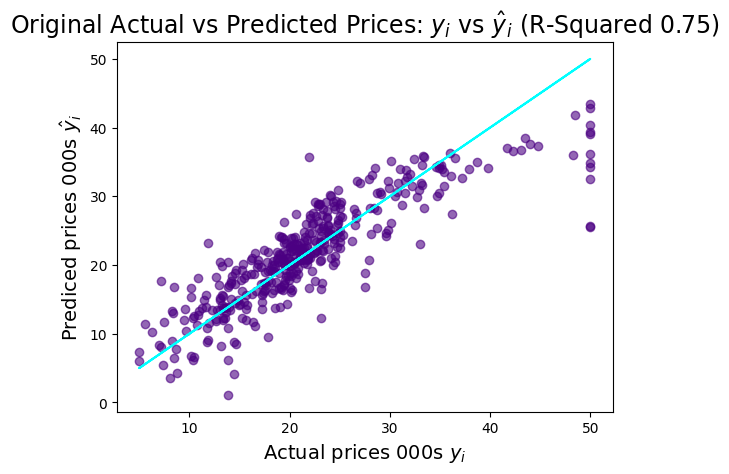

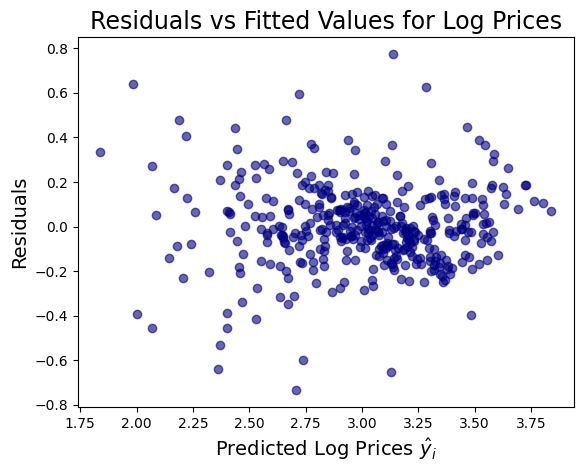

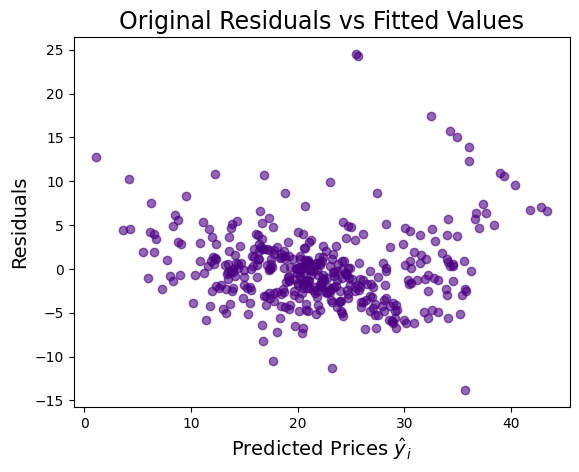

In [44]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



It's hard to see a difference here just by eye. The predicted values seems slightly closer to the cyan line, but eyeballing the charts is not terribly helpful in this case. 

After the regression with log prices:

* Calculated the mean and skewness of the residuals.
* Evaluated whether the mean and skewness of the residuals, with log prices, were closer to zero compared to the previous model.

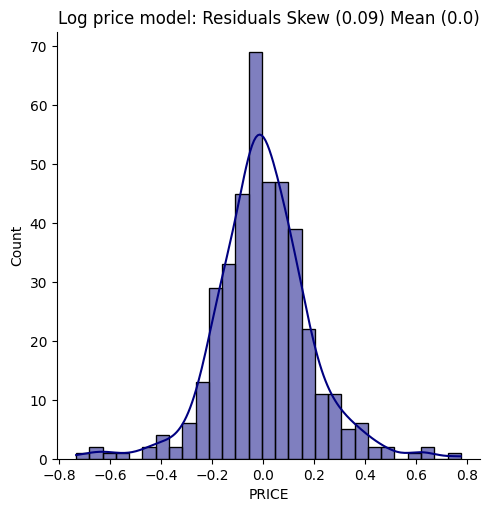

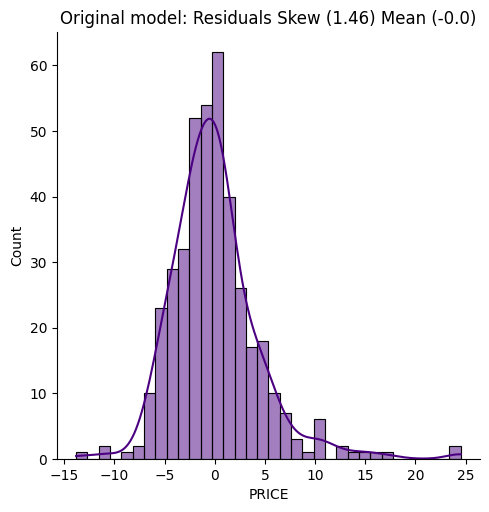

In [45]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation. 

# Compare Out of Sample Performance

The real test is how our model performs on data that it has not seen yet. This is where our `X_test` comes in. 

* Explored the R-squared values of both models.
* Identified the superior-performing model on the test dataset.
* Analyzed whether the R-squared is higher or lower than that of the training dataset, providing insights into the observed trend.

In [46]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model. 

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [47]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In predicting the average property value using the provided statistics:

* Derived the log price estimate.
* Employed the .exp() function to reverse the log transformation and obtain the dollar value estimate.

In [48]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


A property with an average value for all the features has a value of $20,700. 

Keeping the average values for CRIM, RAD, INDUS and others, a property is valued with the following characteristics:

In [55]:
#Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [56]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [57]:
#prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0
